In [156]:
import numpy as np
import pandas as pd

In [158]:
data=pd.read_csv("spam.csv",encoding='Latin-1')

In [159]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2443,ham,&lt;#&gt; great loxahatchee xmas tree burning...,NaN,NaN,NaN
1849,ham,You got job in wipro:)you will get every thing...,NaN,NaN,NaN
2481,ham,K.:)do it at evening da:)urgent:),NaN,NaN,NaN
2492,ham,No drama Pls.i have had enough from you and fa...,NaN,NaN,NaN
5454,ham,Im just wondering what your doing right now?,NaN,NaN,NaN


In [160]:
data.shape

(5572, 5)

Data cleaning

In [161]:
data.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [162]:
data_drop=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [163]:
data_drop.sample(5)

,v1,v2
1293,ham,Happy birthday... May all ur dreams come true...
2458,ham,"Cool, I'll text you when I'm on the way"
1334,ham,Oh ! A half hour is much longer in Syria than ...
1454,ham,Can Ì_ all decide faster cos my sis going home...
4631,ham,"I'm in a meeting, call me later at"


In [164]:
data_drop.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [165]:
data_drop.sample(5)

,target,text
4692,ham,Tessy..pls do me a favor. Pls convey my birthd...
1599,ham,"Yeah probably, I still gotta check out with leo"
1926,ham,Dont give a monkeys wot they think and i certa...
4681,ham,"Haha yeah, 2 oz is kind of a shitload"
5354,ham,Aiyo cos i sms Ì_ then Ì_ neva reply so i wait...


In [166]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [167]:
data_drop['target']=encoder.fit_transform(data_drop['target'])

In [168]:
data_drop.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [169]:
data_drop.isnull().sum()

target    0
text      0
dtype: int64

In [170]:
data_drop.duplicated().sum()

403

In [171]:
duplicate_data_drop=data_drop.drop_duplicates(keep='first')

In [172]:
duplicate_data_drop.duplicated().sum()

0

In [173]:
duplicate_data_drop.shape

(5169, 2)

In [174]:
data=duplicate_data_drop
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Exploratory Data Analysis

In [175]:
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [176]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d6c5c07a50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'hum'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

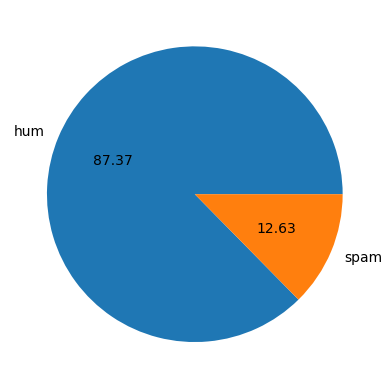

In [177]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['hum','spam'],autopct="%0.2f")

In [178]:
import nltk

In [179]:
data["num_characters"]=data["text"].apply(len)

C:\Users\bsshu\AppData\Local\Temp\ipykernel_34932\413327281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_characters"]=data["text"].apply(len)


In [180]:
data.head(4)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [181]:
data.drop(columns=['num_character'])

KeyError: "['num_character'] not found in axis"

In [182]:
data.sample(4)

,target,text,num_characters
2871,0,See you there!,15
4593,0,I had a good time too. Its nice to do somethin...,106
3790,1,"Twinks, bears, scallies, skins and jocks are c...",156
4809,0,"Honey, can you pls find out how much they sell...",151


In [183]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\bsshu\AppData\Local\Temp\ipykernel_34932\1464717136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [184]:
data.drop(columns=['num_character'])

KeyError: "['num_character'] not found in axis"

In [ ]:
data['num_senstance']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.head(5)

In [ ]:
data[['target','text','num_characters','num_words','num_senstance']].describe()

Describe the ham message in data

In [185]:
data[data['target']==0][['num_characters','num_words','num_senstance']].describe()

KeyError: "['num_senstance'] not in index"

In [186]:
data.head(1)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24


Describe the spam message in data

In [187]:
data[data['target']==1][['num_character','num_words','num_senstance']].describe()

KeyError: "['num_character', 'num_senstance'] not in index"

In [188]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_character'])
sns.histplot(data[data['target']==1]['num_character'],color='red')

KeyError: 'num_character'

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='num_words', ylabel='Count'>

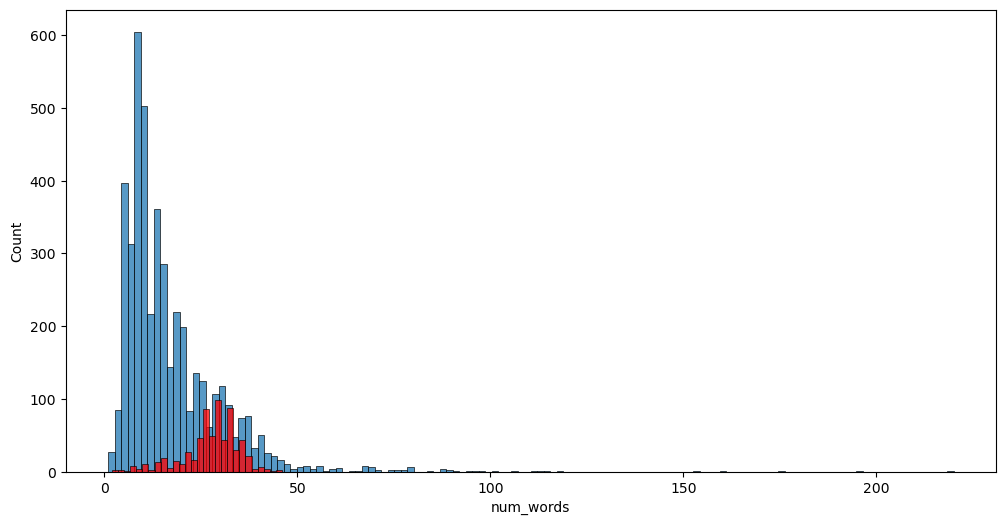

In [189]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

C:\Users\bsshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


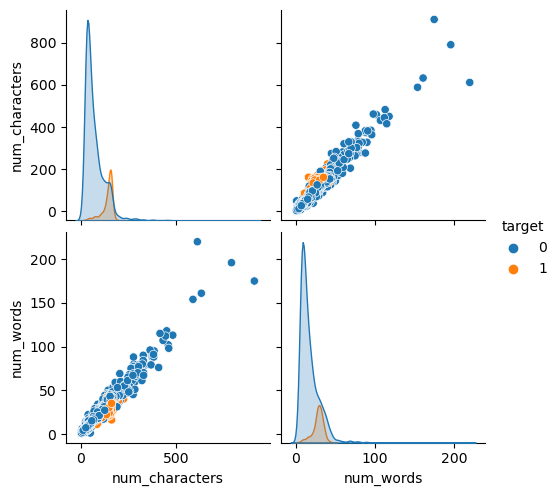

In [190]:
sns.pairplot(data,hue='target')

<Axes: >

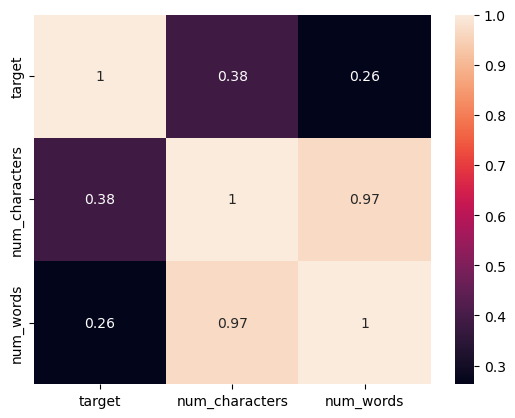

In [191]:
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True)

# Data cleaning

.Lower case

.Tokenization

.Removing special characters

.Removing stop words and punctation

.Stemming


In [194]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')  # You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    filtered_tokens = []
    for token in tokens:
        if token.isalnum():
            filtered_tokens.append(token)
    stemmed_tokens = []
    for token in filtered_tokens:
        if token not in stopwords.words('english') and token not in string.punctuation:
            stemmed_tokens.append(ps.stem(token))
    return " ".join(stemmed_tokens)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [196]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('walking')

'walk'

In [197]:
data['transformed_text']=data['text'].apply(transform_text)

C:\Users\bsshu\AppData\Local\Temp\ipykernel_34932\4157451465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text']=data['text'].apply(transform_text)


In [198]:
data.head(1)

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...


In [200]:
!pip install wordCloud

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [201]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [202]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

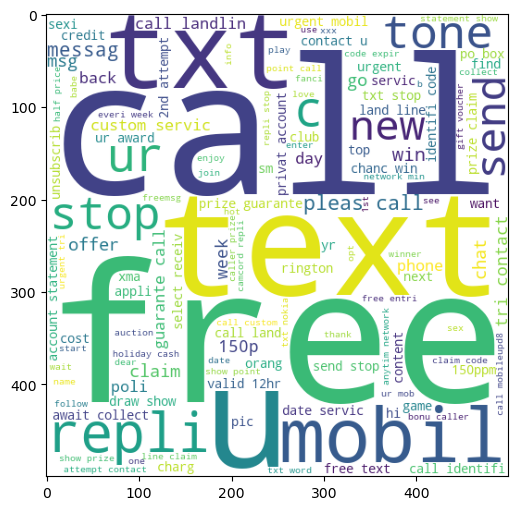

In [203]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [204]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

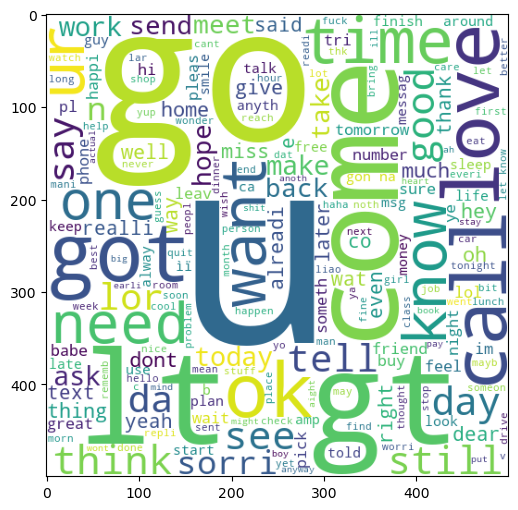

In [205]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [206]:
data_remove=data.drop(columns='num_characters')

In [207]:
data=data_remove

In [208]:
data.head()

,target,text,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,nah think goe usf live around though


In [209]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [210]:
len(ham_corpus)

35404

In [211]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [212]:
len(spam_corpus)

9939

# Model Building

In [213]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [214]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [215]:
X.shape

(5169, 3000)

In [216]:
y = data['target'].values

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [219]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [220]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [221]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [222]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [223]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [224]:
!pip install xgboost

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [226]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [227]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [228]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [229]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [230]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [231]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [232]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [233]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [234]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\bsshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


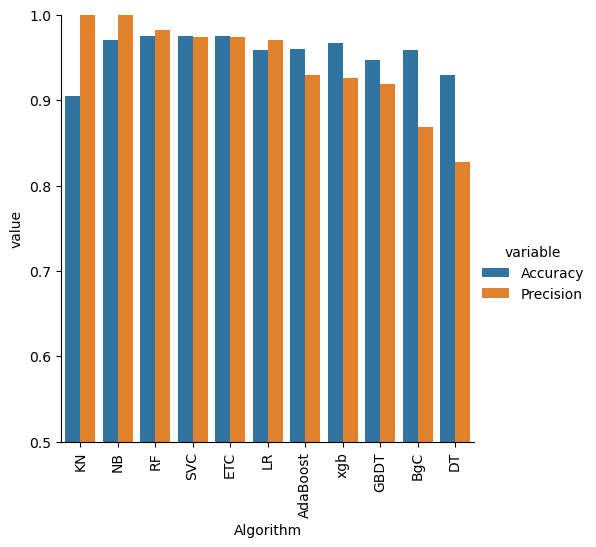

In [235]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [236]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [237]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [238]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [239]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [240]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [241]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [242]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [243]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [244]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [245]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [246]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [247]:
from sklearn.ensemble import StackingClassifier

In [248]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [249]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [250]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))